In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv(r'/content/drive/My Drive/ML Datasets/Real estate.csv')
print(df, "\n")

      No  X1 transaction date  X2 house age  \
0      1             2012.917          32.0   
1      2             2012.917          19.5   
2      3             2013.583          13.3   
3      4             2013.500          13.3   
4      5             2012.833           5.0   
..   ...                  ...           ...   
409  410             2013.000          13.7   
410  411             2012.667           5.6   
411  412             2013.250          18.8   
412  413             2013.000           8.1   
413  414             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4                                 3

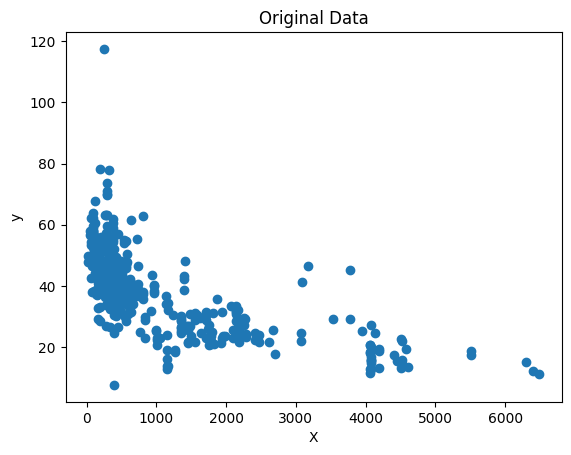

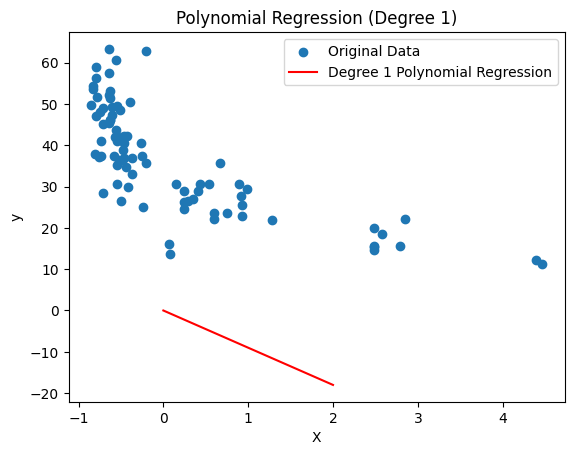

Mean Squared Error (Degree 1): 1462.5706853057281


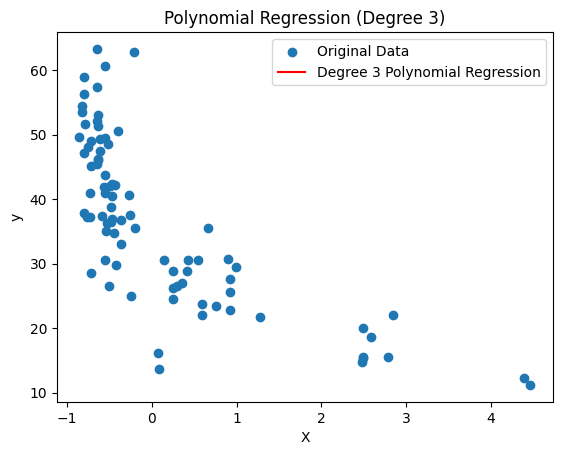

Mean Squared Error (Degree 3): nan


<ipython-input-5-e263a60ced4d>:40: RuntimeWarning: invalid value encountered in subtract
  theta -= learning_rate * gradient


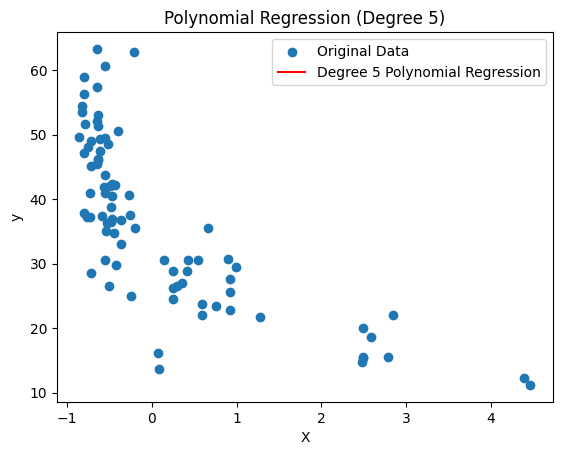

Mean Squared Error (Degree 5): nan


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame containing the dataset

# Generate synthetic data
X = df['X3 distance to the nearest MRT station'].values.reshape(-1, 1)  # X2 house age
y = df['Y house price of unit area'].values.reshape(-1, 1)  # Y house price of unit area

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Plot the original data
plt.scatter(X, y, label='Original Data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Original Data')
plt.show()

# Function to add polynomial features
def add_polynomial_features(X, degree):
    return np.concatenate([X**i for i in range(1, degree + 1)], axis=1)

# Function to perform polynomial regression using gradient descent with regularization
def polynomial_regression_regularized(X, y, degree, learning_rate=0.1, epochs=5000, alpha=0.01):
    m, n = X.shape
    theta = np.random.randn(n, 1)

    for epoch in range(epochs):
        y_pred = X.dot(theta)
        error = y_pred - y
        gradient = (2/m * X.T.dot(error)) + alpha * np.sign(theta)
        theta -= learning_rate * gradient

    return theta

# Function to make predictions using the polynomial regression model
def predict(X, theta):
    return X.dot(theta)

# Function to plot the polynomial regression model
def plot_polynomial_regression(X, y, theta, degree):
    X_range = np.linspace(0, 2, 100).reshape(-1, 1)
    X_poly_range = add_polynomial_features(X_range, degree)
    y_pred = predict(X_poly_range, theta)

    plt.scatter(X, y, label='Original Data')
    plt.plot(X_range, y_pred, 'r-', label=f'Degree {degree} Polynomial Regression')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.legend()
    plt.show()

# Perform polynomial regression for different degrees
degrees = [1, 3, 5]

for degree in degrees:
    X_poly_train = add_polynomial_features(X_train_scaled, degree)
    theta = polynomial_regression_regularized(X_poly_train, y_train, degree)

    # Plot the polynomial regression model
    plot_polynomial_regression(X_test_scaled, y_test, theta, degree)

    # Calculate and print the mean squared error on the test set
    X_poly_test = add_polynomial_features(X_test_scaled, degree)
    y_pred_test = predict(X_poly_test, theta)
    mse = np.mean((y_pred_test - y_test)**2)
    print(f'Mean Squared Error (Degree {degree}): {mse}')


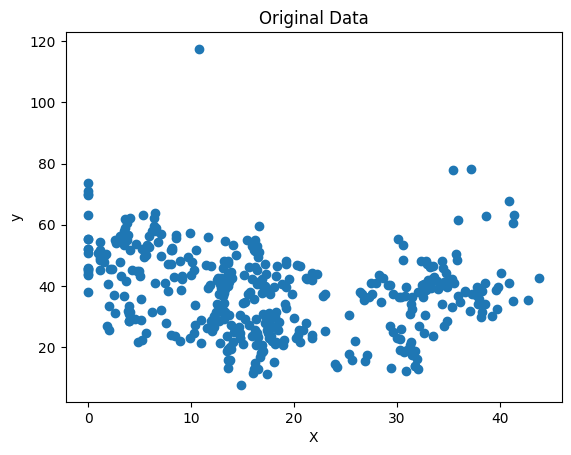

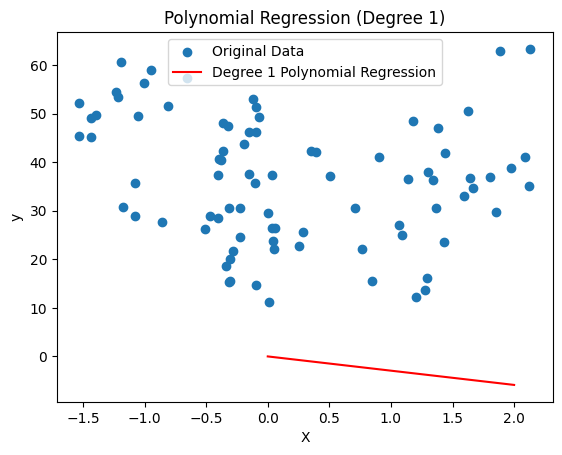

Mean Squared Error (Degree 1): 1523.6572385059885


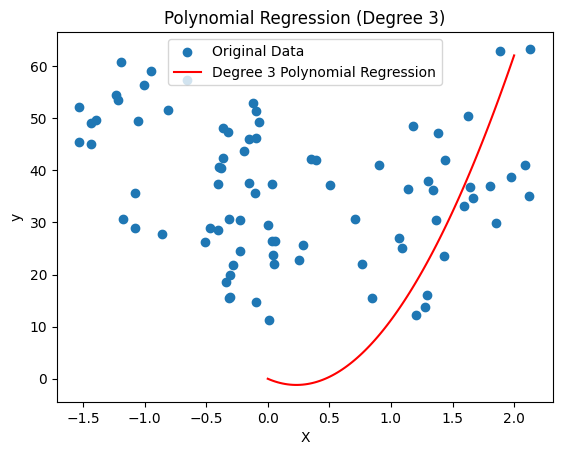

Mean Squared Error (Degree 3): 640.4578741917758


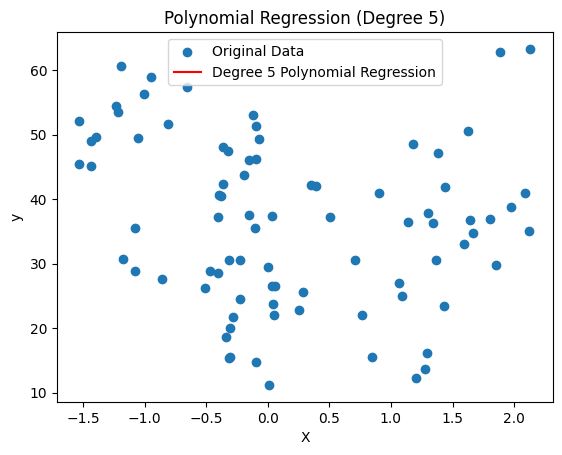

Mean Squared Error (Degree 5): nan


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame containing the dataset

# Generate synthetic data
X = df['X2 house age'].values.reshape(-1, 1)  # X2 house age
y = df['Y house price of unit area'].values.reshape(-1, 1)  # Y house price of unit area

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Plot the original data
plt.scatter(X, y, label='Original Data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Original Data')
plt.show()

# Function to add polynomial features
def add_polynomial_features(X, degree):
    return np.concatenate([X**i for i in range(1, degree + 1)], axis=1)

# Function to perform polynomial regression using gradient descent with regularization
def polynomial_regression_regularized(X, y, degree, learning_rate=0.1, epochs=5000, alpha=0.01):
    m, n = X.shape
    theta = np.random.randn(n, 1)

    for epoch in range(epochs):
        y_pred = X.dot(theta)
        error = y_pred - y
        gradient = (2/m * X.T.dot(error)) + alpha * np.sign(theta)
        theta -= learning_rate * gradient

    return theta

# Function to make predictions using the polynomial regression model
def predict(X, theta):
    return X.dot(theta)

# Function to plot the polynomial regression model
def plot_polynomial_regression(X, y, theta, degree):
    X_range = np.linspace(0, 2, 100).reshape(-1, 1)
    X_poly_range = add_polynomial_features(X_range, degree)
    y_pred = predict(X_poly_range, theta)

    plt.scatter(X, y, label='Original Data')
    plt.plot(X_range, y_pred, 'r-', label=f'Degree {degree} Polynomial Regression')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.legend()
    plt.show()

# Perform polynomial regression for different degrees
degrees = [1, 3, 5]

for degree in degrees:
    X_poly_train = add_polynomial_features(X_train_scaled, degree)
    theta = polynomial_regression_regularized(X_poly_train, y_train, degree)

    # Plot the polynomial regression model
    plot_polynomial_regression(X_test_scaled, y_test, theta, degree)

    # Calculate and print the mean squared error on the test set
    X_poly_test = add_polynomial_features(X_test_scaled, degree)
    y_pred_test = predict(X_poly_test, theta)
    mse = np.mean((y_pred_test - y_test)**2)
    print(f'Mean Squared Error (Degree {degree}): {mse}')


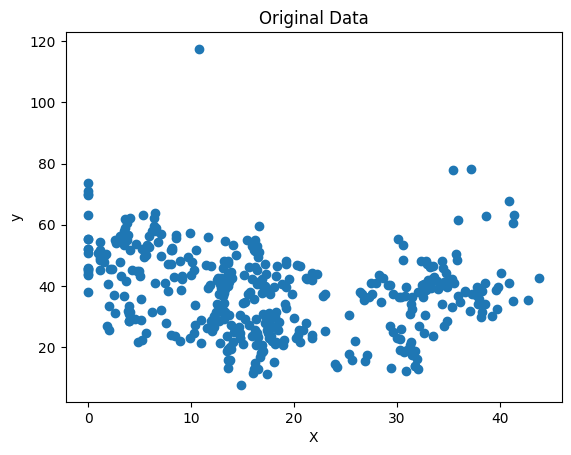

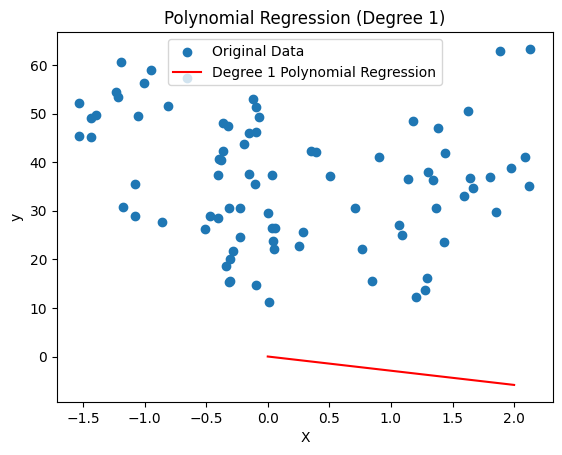

Mean Squared Error (Degree 1): 1523.5114058460103


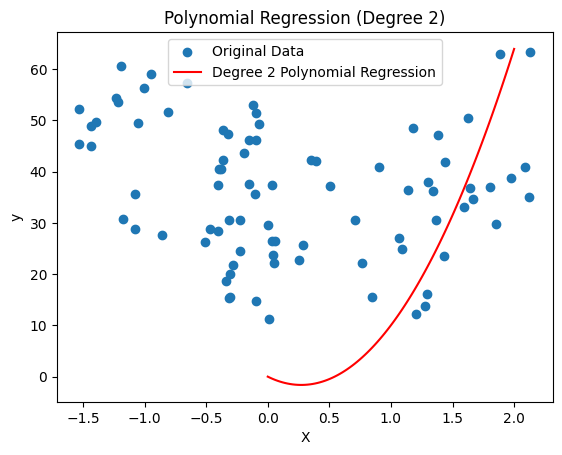

Mean Squared Error (Degree 2): 644.747706116734


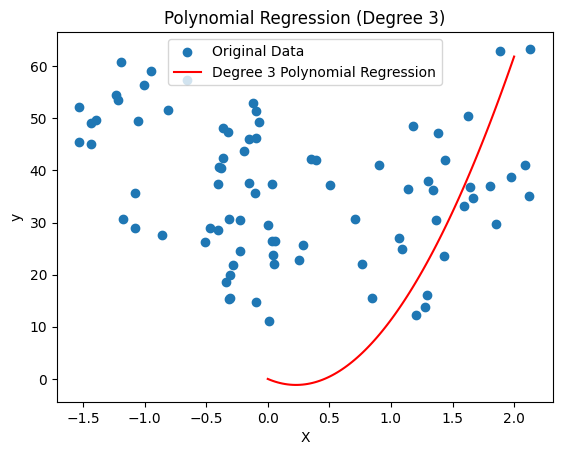

Mean Squared Error (Degree 3): 640.1092244932203


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame containing the dataset

# Generate synthetic data
X = df['X2 house age'].values.reshape(-1, 1)  # X2 house age
y = df['Y house price of unit area'].values.reshape(-1, 1)  # Y house price of unit area

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Plot the original data
plt.scatter(X, y, label='Original Data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Original Data')
plt.show()

# Function to add polynomial features
def add_polynomial_features(X, degree):
    return np.concatenate([X**i for i in range(1, degree + 1)], axis=1)

# Function to perform polynomial regression using gradient descent with regularization
def polynomial_regression_regularized(X, y, degree, learning_rate=0.1, epochs=5000, alpha=0.01):
    m, n = X.shape
    theta = np.random.randn(n, 1)

    for epoch in range(epochs):
        y_pred = X.dot(theta)
        error = y_pred - y
        gradient = (2/m * X.T.dot(error)) + alpha * theta  # Update this line
        theta -= learning_rate * gradient

    return theta

# Function to make predictions using the polynomial regression model
def predict(X, theta):
    return X.dot(theta)

# Function to plot the polynomial regression model
def plot_polynomial_regression(X, y, theta, degree):
    X_range = np.linspace(0, 2, 100).reshape(-1, 1)
    X_poly_range = add_polynomial_features(X_range, degree)
    y_pred = predict(X_poly_range, theta)

    plt.scatter(X, y, label='Original Data')
    plt.plot(X_range, y_pred, 'r-', label=f'Degree {degree} Polynomial Regression')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.legend()
    plt.show()

# Perform polynomial regression for different degrees
degrees = [1, 2, 3]

for degree in degrees:
    X_poly_train = add_polynomial_features(X_train_scaled, degree)
    theta = polynomial_regression_regularized(X_poly_train, y_train, degree)

    # Plot the polynomial regression model
    plot_polynomial_regression(X_test_scaled, y_test, theta, degree)

    # Calculate and print the mean squared error on the test set
    X_poly_test = add_polynomial_features(X_test_scaled, degree)
    y_pred_test = predict(X_poly_test, theta)
    mse = np.mean((y_pred_test - y_test)**2)
    print(f'Mean Squared Error (Degree {degree}): {mse}')


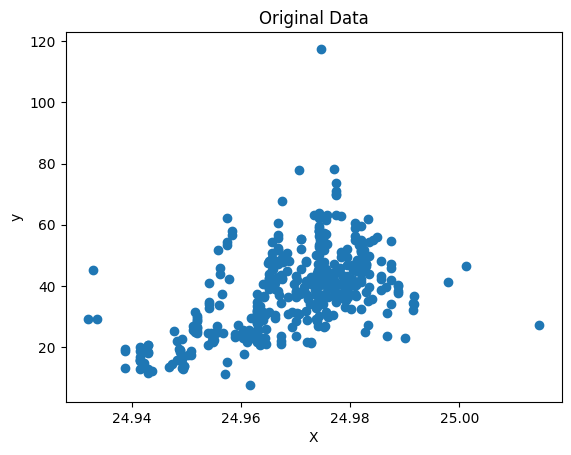

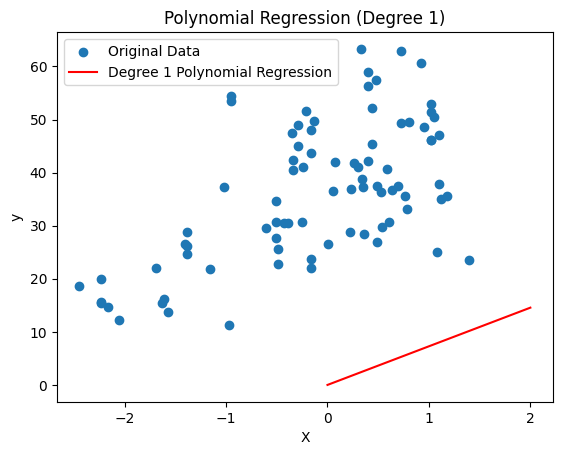

Mean Squared Error (Degree 1): 1492.3335889780153


<ipython-input-6-e22de7a38727>:40: RuntimeWarning: invalid value encountered in subtract
  theta -= learning_rate * gradient


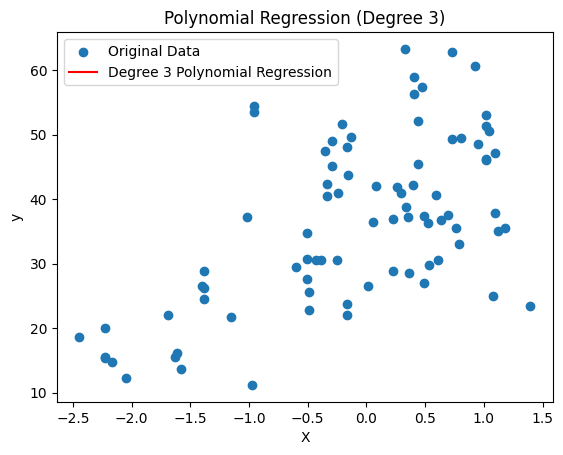

Mean Squared Error (Degree 3): nan


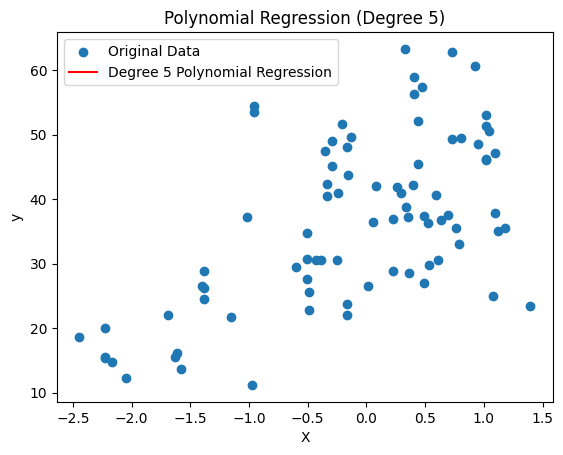

Mean Squared Error (Degree 5): nan


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame containing the dataset

# Generate synthetic data
X = df['X5 latitude'].values.reshape(-1, 1)  # X2 house age
y = df['Y house price of unit area'].values.reshape(-1, 1)  # Y house price of unit area

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Plot the original data
plt.scatter(X, y, label='Original Data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Original Data')
plt.show()

# Function to add polynomial features
def add_polynomial_features(X, degree):
    return np.concatenate([X**i for i in range(1, degree + 1)], axis=1)

# Function to perform polynomial regression using gradient descent with regularization
def polynomial_regression_regularized(X, y, degree, learning_rate=0.1, epochs=5000, alpha=0.01):
    m, n = X.shape
    theta = np.random.randn(n, 1)

    for epoch in range(epochs):
        y_pred = X.dot(theta)
        error = y_pred - y
        gradient = (2/m * X.T.dot(error)) + alpha * np.sign(theta)
        theta -= learning_rate * gradient

    return theta

# Function to make predictions using the polynomial regression model
def predict(X, theta):
    return X.dot(theta)

# Function to plot the polynomial regression model
def plot_polynomial_regression(X, y, theta, degree):
    X_range = np.linspace(0, 2, 100).reshape(-1, 1)
    X_poly_range = add_polynomial_features(X_range, degree)
    y_pred = predict(X_poly_range, theta)

    plt.scatter(X, y, label='Original Data')
    plt.plot(X_range, y_pred, 'r-', label=f'Degree {degree} Polynomial Regression')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.legend()
    plt.show()

# Perform polynomial regression for different degrees
degrees = [1, 3, 5]

for degree in degrees:
    X_poly_train = add_polynomial_features(X_train_scaled, degree)
    theta = polynomial_regression_regularized(X_poly_train, y_train, degree)

    # Plot the polynomial regression model
    plot_polynomial_regression(X_test_scaled, y_test, theta, degree)

    # Calculate and print the mean squared error on the test set
    X_poly_test = add_polynomial_features(X_test_scaled, degree)
    y_pred_test = predict(X_poly_test, theta)
    mse = np.mean((y_pred_test - y_test)**2)
    print(f'Mean Squared Error (Degree {degree}): {mse}')


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import openml

# Load the Boston Housing dataset from OpenML
dataset_id = 42165
dataset = openml.datasets.get_dataset(dataset_id)
X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute)

# Select a single feature for simplicity (e.g., average number of rooms)
X = X[:, 5:6]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to add polynomial features
def add_polynomial_features(X, degree):
    return np.concatenate([X**i for i in range(1, degree + 1)], axis=1)

# Function to perform polynomial regression using gradient descent with regularization
def polynomial_regression_regularized(X, y, degree, learning_rate=0.1, epochs=5000, alpha=0.01):
    m, n = X.shape
    theta = np.random.randn(n, 1)

    for epoch in range(epochs):
        y_pred = X.dot(theta)
        error = y_pred - y
        gradient = (2/m * X.T.dot(error)) + alpha * theta
        theta -= learning_rate * gradient

    return theta

# Function to make predictions using the polynomial regression model
def predict(X, theta):
    return X.dot(theta)

# Function to plot the polynomial regression model
def plot_polynomial_regression(X, y, theta, degree):
    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_poly_range = add_polynomial_features(X_range, degree)
    y_pred = predict(X_poly_range, theta)

    plt.scatter(X, y, label='Original Data')
    plt.plot(X_range, y_pred, 'r-', label=f'Degree {degree} Polynomial Regression')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.legend()
    plt.show()

# Perform polynomial regression for different degrees
degrees = [1, 3, 5]

for degree in degrees:
    X_poly_train = add_polynomial_features(X_train_scaled, degree)
    theta = polynomial_regression_regularized(X_poly_train, y_train, degree)

    # Plot the polynomial regression model
    plot_polynomial_regression(X_test_scaled, y_test, theta, degree)

    # Calculate and print the mean squared error on the test set
    X_poly_test = add_polynomial_features(X_test_scaled, degree)
    y_pred_test = predict(X_poly_test, theta)
    mse = np.mean((y_pred_test - y_test)**2)
    print(f'Mean Squared Error (Degree {degree}): {mse}')


/usr/local/lib/python3.10/dist-packages/openml/datasets/functions.py:438: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(


InvalidIndexError: ignored

In [ ]:
pip install openml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.3/131.3 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 36.6 MB/s eta 0:00:00
  Created wheel for openml: filename=openml-0.14.1-py3-none-any.whl size=146923 sha256=62b244f9d5394942685c29670c8d5f75ced5daffdfa26cb5a2e42c2d302e78a2
  Stored in directory: /root/.cache/pip/wheels/75/bc/fd/739778254a2881ef96b139d0aaf60c6d4f9130bb1459b48f10
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11717 sha256=b70e6a802f6e1d92d00fb4edb12631fa62ef5cb51b1e5a51034a91f44c5661f6
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built openml liac-arff
